In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Sheart\Sheart_NN_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,1.0,70.0,NaN,130.0,322.0,0.0,2.0,NaN,NaN,2.4,2.0,3.0,3.0
1,0.0,67.0,3.0,115.0,NaN,0.0,2.0,NaN,NaN,1.6,2.0,0.0,7.0
2,1.0,57.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0
3,1.0,64.0,4.0,128.0,263.0,0.0,NaN,105.0,1.0,0.2,2.0,1.0,7.0
4,0.0,74.0,2.0,120.0,269.0,0.0,2.0,NaN,1.0,0.2,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1.0,52.0,3.0,172.0,NaN,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0
266,1.0,44.0,2.0,120.0,263.0,0.0,0.0,173.0,0.0,NaN,1.0,0.0,7.0
267,0.0,56.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0
268,1.0,57.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,NaN,6.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	7
float64		column 2	36
float64		column 3	36
float64		column 4	7
float64		column 5	35
float64		column 6	7
float64		column 7	15
float64		column 8	35
float64		column 9	35
float64		column 10	50
float64		column 11	7
float64		column 12	36
float64		column 13	36


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
count,263.000000,234.000000,234.000000,263.000000,235.000000,263.000000,255.000000,235.000000,235.000000,220.000000,263.000000,234.000000,234.000000
mean,0.669202,54.320513,3.200855,131.159696,249.557447,0.152091,1.019608,149.634043,0.319149,1.005909,1.589354,0.619658,4.730769
std,0.471398,8.799376,0.901976,17.502813,45.848971,0.359794,0.997836,22.420660,0.467142,1.073811,0.616721,0.886594,1.950062
min,0.000000,29.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,0.000000,48.000000,3.000000,120.000000,217.500000,0.000000,0.000000,136.500000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,1.000000,55.000000,3.000000,130.000000,246.000000,0.000000,2.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,1.000000,60.000000,4.000000,140.000000,275.500000,0.000000,2.000000,165.000000,1.000000,1.600000,2.000000,1.000000,7.000000
max,1.000000,76.000000,4.000000,200.000000,417.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


<AxesSubplot:>

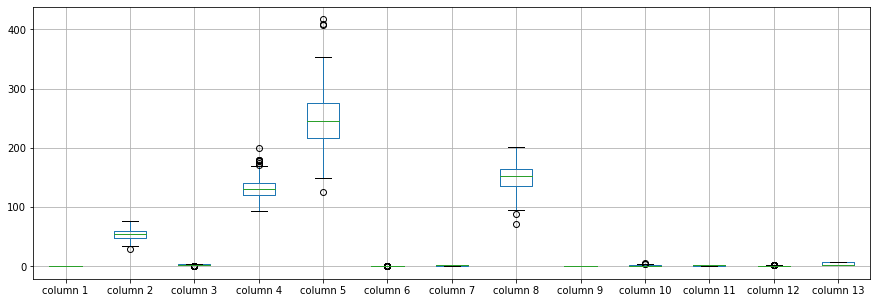

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1       0.669202
column 2      54.320513
column 3       3.200855
column 4     131.159696
column 5     249.557447
column 6       0.152091
column 7       1.019608
column 8     149.634043
column 9       0.319149
column 10      1.005909
column 11      1.589354
column 12      0.619658
column 13      4.730769
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
column 1,1.000000,-0.104363,0.010400,-0.066529,-0.184137,0.044992,0.051512,-0.048050,0.179511,0.066247,0.046562,0.073113,0.407086
column 2,-0.104363,1.000000,0.111943,0.258611,0.170575,0.098870,0.136388,-0.447509,0.115816,0.224761,0.177372,0.334283,0.138286
column 3,0.010400,0.111943,1.000000,0.044195,0.197652,-0.069620,0.096444,-0.330970,0.334032,0.095101,0.103059,0.159573,0.248200
column 4,-0.066529,0.258611,0.044195,1.000000,0.169778,0.162157,0.105791,-0.084685,0.055886,0.223184,0.169784,0.110420,0.123969
column 5,-0.184137,0.170575,0.197652,0.169778,1.000000,0.018089,0.148310,-0.117350,0.158123,0.099653,0.001313,0.188748,0.057192
column 6,0.044992,0.098870,-0.069620,0.162157,0.018089,1.000000,0.065624,-0.000262,-0.031455,-0.023922,0.046108,0.116689,0.049174
column 7,0.051512,0.136388,0.096444,0.105791,0.148310,0.065624,1.000000,-0.053620,0.101200,0.099932,0.160399,0.127109,0.028088
column 8,-0.048050,-0.447509,-0.330970,-0.084685,-0.117350,-0.000262,-0.053620,1.000000,-0.319622,-0.279787,-0.368037,-0.276136,-0.171072
column 9,0.179511,0.115816,0.334032,0.055886,0.158123,-0.031455,0.101200,-0.319622,1.000000,0.212029,0.191519,0.119715,0.286607
column 10,0.066247,0.224761,0.095101,0.223184,0.099653,-0.023922,0.099932,-0.279787,0.212029,1.000000,0.566892,0.279014,0.261959


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [13,13+56,13+56+56,13+56+56+56,13+56+56+56+56,13+56+56+56+56+56,13+56+56+56+56,13+56+56+56,13+56+56,13+56,13], vae_layer = False, seed = 56)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [13]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 542.7909164428711
Epoch: 1 , loss: 542.775577545166
Epoch: 2 , loss: 543.4418754577637
Epoch: 3 , loss: 543.5557651519775
Epoch: 4 , loss: 540.5759086608887
Epoch: 5 , loss: 542.0978984832764
Epoch: 6 , loss: 539.7486877441406
Epoch: 7 , loss: 541.7818431854248
Epoch: 8 , loss: 540.617919921875
Epoch: 9 , loss: 543.1153411865234
Epoch: 10 , loss: 539.3376007080078
Epoch: 11 , loss: 542.8490829467773
Epoch: 12 , loss: 539.3122711181641
Epoch: 13 , loss: 542.5394611358643
Epoch: 14 , loss: 542.1801357269287
Epoch: 15 , loss: 545.94455909729
Epoch: 16 , loss: 543.8803024291992
Epoch: 17 , loss: 541.9022789001465
Epoch: 18 , loss: 542.8816719055176
Epoch: 19 , loss: 541.143087387085
Epoch: 20 , loss: 535.1587219238281
Epoch: 21 , loss: 536.4199199676514
Epoch: 22 , loss: 534.893627166748
Epoch: 23 , loss: 530.5993461608887
Epoch: 24 , loss: 522.8501205444336
Epoch: 25 , loss: 513.6150188446045
Epoch: 26 , 

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(270, 13)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1       1.0000
column 2      48.0000
column 3       2.0000
column 4     130.0000
column 5      57.5686
column 6       0.0000
column 7       2.0000
column 8     180.0000
column 9       0.0000
column 10      0.2000
column 11      2.0000
column 12      0.0000
column 13      3.0000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Sheart.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,0.0,0.0,-2.12563,0.0,0.000000,0.0,0.000000,-53.090118,0.109503,0.000000,0.0,0.000000,0.0
1,0.0,0.0,0.00000,0.0,-476.931564,0.0,0.000000,-88.924995,0.167163,0.000000,0.0,0.000000,0.0
2,0.0,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
3,0.0,0.0,0.00000,0.0,0.000000,0.0,1.256929,0.000000,0.000000,0.000000,0.0,0.000000,0.0
4,0.0,0.0,0.00000,0.0,0.000000,0.0,0.000000,-70.124355,0.000000,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.0,0.0,0.00000,0.0,-103.240196,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
266,0.0,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.486326,0.0,0.000000,0.0
267,0.0,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
268,0.0,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.876401,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(1285.496090879488, 5414.752392307519)

In [17]:
NRMS=numerator/denominator
NRMS


0.23740625567767998

In [18]:
new_df.iloc[66,:]

column 1       0.173998
column 2      51.000000
column 3       4.000000
column 4     140.000000
column 5     261.000000
column 6       0.000000
column 7       2.000000
column 8      49.681454
column 9       0.112937
column 10      0.000000
column 11      1.000000
column 12      0.000000
column 13      3.000000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,1.0,70.0,1.87437,130.0,322.000000,0.0,2.000000,55.909882,0.109503,2.400000,2.0,3.000000,3.0
1,0.0,67.0,3.00000,115.0,87.068436,0.0,2.000000,71.075005,0.167163,1.600000,2.0,0.000000,7.0
2,1.0,57.0,2.00000,124.0,261.000000,0.0,0.000000,141.000000,0.000000,0.300000,1.0,0.000000,7.0
3,1.0,64.0,4.00000,128.0,263.000000,0.0,1.256929,105.000000,1.000000,0.200000,2.0,1.000000,7.0
4,0.0,74.0,2.00000,120.0,269.000000,0.0,2.000000,50.875645,1.000000,0.200000,1.0,1.000000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1.0,52.0,3.00000,172.0,95.759804,1.0,0.000000,162.000000,0.000000,0.500000,1.0,0.000000,7.0
266,1.0,44.0,2.00000,120.0,263.000000,0.0,0.000000,173.000000,0.000000,0.486326,1.0,0.000000,7.0
267,0.0,56.0,2.00000,140.0,294.000000,0.0,2.000000,153.000000,0.000000,1.300000,2.0,0.000000,3.0
268,1.0,57.0,4.00000,140.0,192.000000,0.0,0.000000,148.000000,0.000000,0.400000,2.0,0.876401,6.0


In [21]:
imputations[-1].to_excel("Sheart_NN_10(imp).xlsx", index=False, header=False)